In [1]:
import os
import cv2
import numpy as np
import urllib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# modelFile, configFile, and classFile: Paths to the pre-trained model file, configuration file,
#  and class labels file, respectively.
modelFile = "models/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb"
configFile = "models/ssd_mobilenet_v2_coco_2018_03_29.pbtxt"
classFile = "coco_class_labels.txt"

# Opens the classFile and reads its contents. Splits the contents by newline character to create a 
# list of class labels and stores it in the labels variable. Finally, prints the labels.
with open(classFile) as fp:
    labels = fp.read().split("\n")
print(labels)

['unlabeled', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush', '']


## The steps for performing infernece using a DNN model are summarized below:
    
##### 1. Load the model and input image into memory.
##### 2. Detect objects using a forward pass through the network.
##### 3. Display the detected objects with bounding boxes and class labels.

# Read Tensorflow Model

In [3]:
# Loads a pre-trained deep learning model from TensorFlow using cv2.dnn.readNetFromTensorflow() function.
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

# Detect Objects

In [4]:
# Defines a function detect_objects() that takes the neural network model net and an image im as input.
def detect_objects(net, im):
    dim = 300

    #Resizes the image to (300, 300) pixels.
    #Converts the image to a blob suitable for input to the neural network.
    blob = cv2.dnn.blobFromImage(im, 1.0, size=(dim, dim), mean=(0,0,0), swapRB=True, crop=False)

    #Passes the blob to the neural network and performs object detection.
    net.setInput(blob)
    
    #Returns the detected objects.
    # Peform Prediction
    objects = net.forward()
    return objects

In [5]:
def display_text(im, text, x, y):
    
    # Get text size 
    textSize = cv2.getTextSize(text, FONTFACE, FONT_SCALE, THICKNESS)
    dim = textSize[0]
    baseline = textSize[1]
            
    # Use text size to create a black rectangle    
    cv2.rectangle(im, (x,y-dim[1] - baseline), (x + dim[0], y + baseline), (0,0,0), cv2.FILLED);
    # Display text inside the rectangle
    cv2.putText(im, text, (x, y-5 ), FONTFACE, FONT_SCALE, (0, 255, 255), THICKNESS, cv2.LINE_AA)

# Display Objects

In [6]:
# Defines constants for text display parameters.
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.7
THICKNESS = 1

# Defines a function display_objects() that takes an image im, detected objects, and an optional threshold parameter.
def display_objects(im, objects, threshold = 0.25):

    rows = im.shape[0]
    cols = im.shape[1]

    # For every Detected Object
    # it Iterates over the detected objects.
    for i in range(objects.shape[2]):
        # Find the class and confidence 
        classId = int(objects[0, 0, i, 1])
        score = float(objects[0, 0, i, 2])
        
        # Recover original cordinates from normalized coordinates
        # And Draws rectangles and displays text labels on the image for each detected object.
        x = int(objects[0, 0, i, 3] * cols)
        y = int(objects[0, 0, i, 4] * rows)
        w = int(objects[0, 0, i, 5] * cols - x)
        h = int(objects[0, 0, i, 6] * rows - y)
        
        # Check if the detection is of good quality
        if score > threshold:
            display_text(im, "{}".format(labels[classId]), x, y)
            cv2.rectangle(im, (x, y), (x + w, y + h), (255, 255, 255), 2)
    
    # Convert Image to RGB since we are using Matplotlib for displaying image
    # And Displays the annotated image using Matplotlib.
    mp_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(30,10))
    plt.imshow(mp_img)
    plt.show();

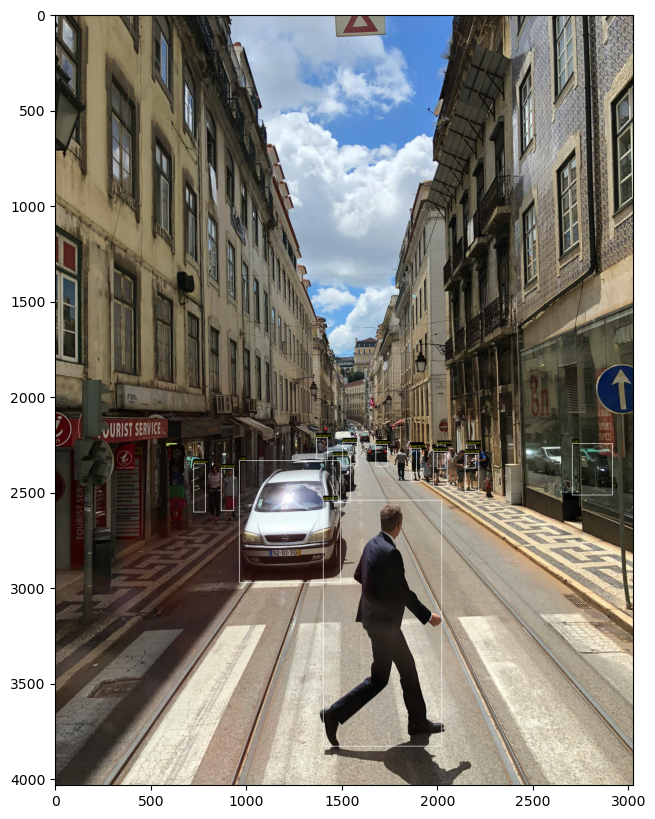

In [7]:
im = cv2.imread('street.jpg')
objects = detect_objects(net, im)
display_objects(im, objects)

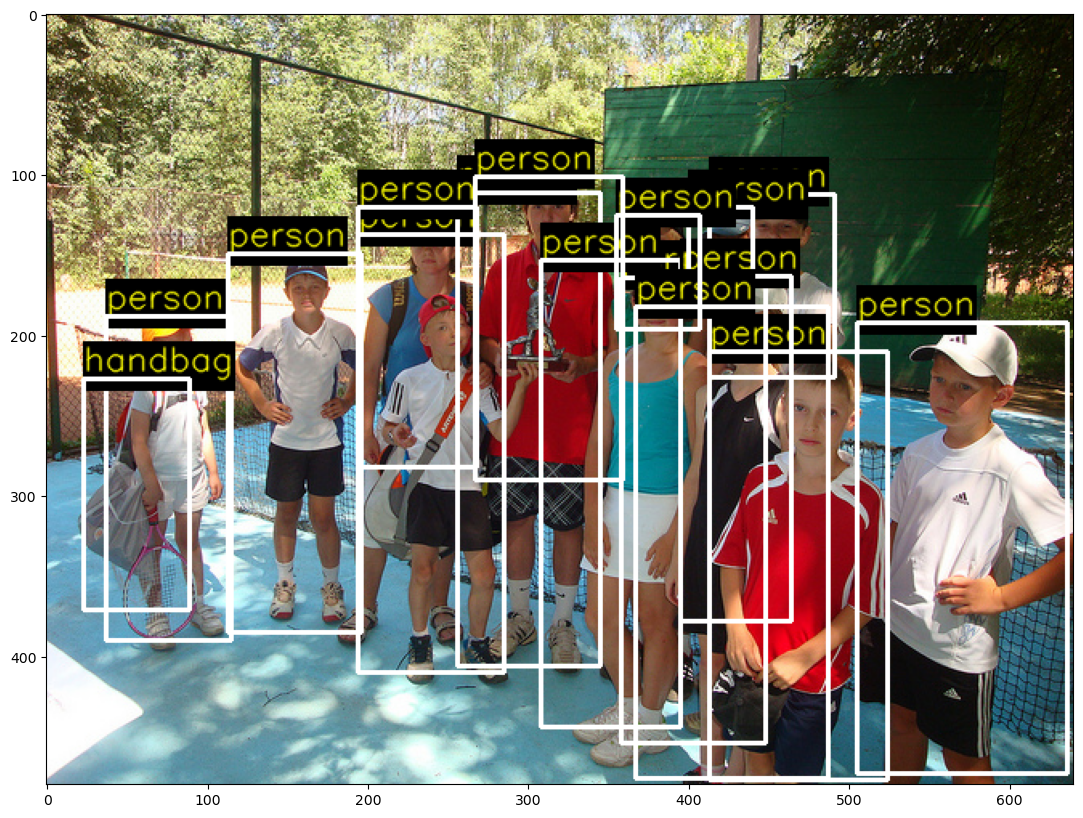

In [8]:
im = cv2.imread("000000001000.jpg")
objects = detect_objects(net, im)
display_objects(im, objects)

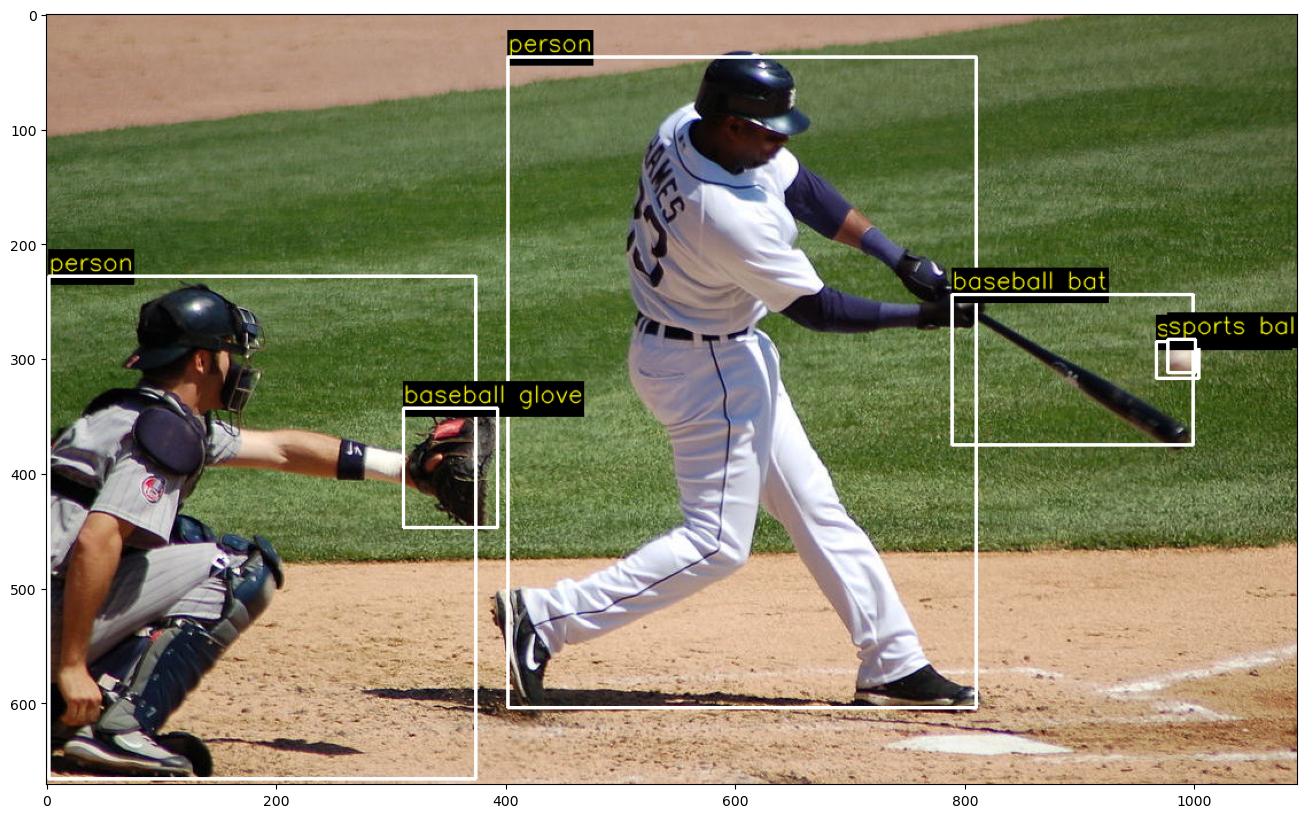

In [9]:
im = cv2.imread("baseball.jpg")
objects = detect_objects(net, im)
display_objects(im, objects)

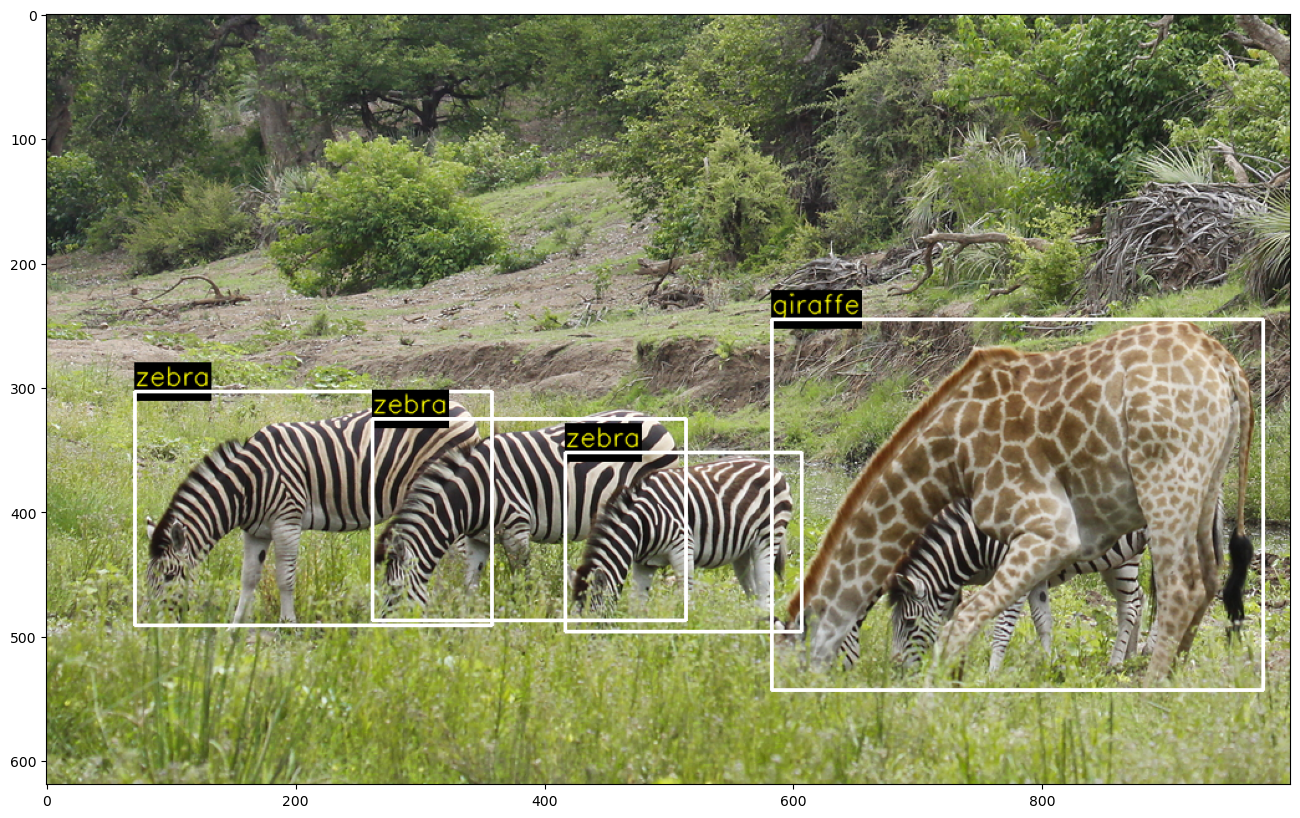

In [10]:
im = cv2.imread("giraffe-zebra.jpg")
objects = detect_objects(net, im)
display_objects(im, objects)


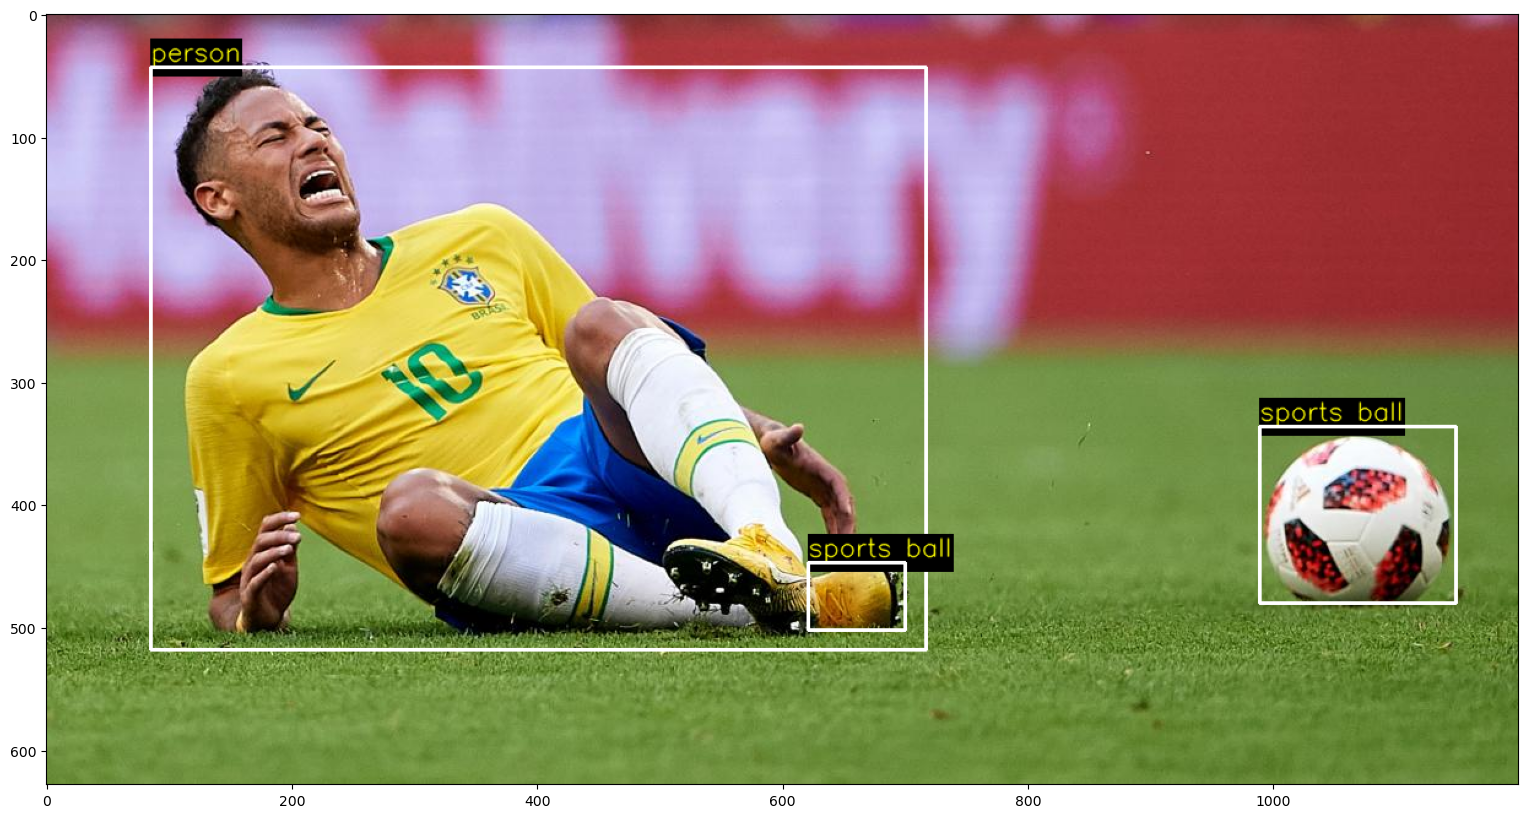

In [11]:
im = cv2.imread("soccer.jpg")
objects = detect_objects(net, im)
display_objects(im, objects)
